In [1]:
#Load libraries 

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#import numpy as np
#from sklearn.decomposition import PCA
#import sspa
#from sklearn.preprocessing import StandardScaler
#import scipy 
#import networkx as nx


In [2]:
#Read in file to check
df = pd.read_csv("Data/Su_multi_omics_data.csv", index_col=0)

In [5]:
#This function takes in dataframe, and masks one half and the diagonal to remove duplicates to prepare for a histogram plot
def duplicate_removal(df):
    #Mask the upper half of the dataframe (so I don't view the comparisons between the two same genes, and also the duplicate comparisons are removed)
    mask =  df.copy()
    mask = np.triu(np.ones(mask.shape)).astype(bool)
    mask = np.invert(mask) #invert true and false values so the diagonal is False as well
    non_dup_df = pd.DataFrame(df)
    non_dup_df = non_dup_df.where(mask) #Replace all false values with NaN using mask

    spearman_hist = non_dup_df.to_numpy().flatten()
    spearman_hist = spearman_hist[~np.isnan(spearman_hist)] #remove nan values

    return spearman_hist

### Data exploration

In [3]:
print("Number of compounds:", len(df. columns[:-2]) )
print("Number of samples:", len(df. index))

print(df['WHO_status'].value_counts()) 
print(df['Group'].value_counts())

#return non-integer columns
df.dtypes[df.dtypes != 'int64'][df.dtypes != 'float64']

Number of compounds: 787
Number of samples: 128
3-4    56
1-2    45
5-7    27
Name: WHO_status, dtype: int64
COVID19     128
Name: Group, dtype: int64


WHO_status    object
Group         object
dtype: object

In [10]:
#Check data is standardised 

df_num  = df.iloc[:,:-2] #all rows, all columns apart from last two
print(df_num.max().max())
print(df_num.min().min())
print(df_num.mean(axis = 0)) #mean of 0
print(df_num.std(axis = 0)) #sd of 1


13.771030461658697
-9.506183139855432
1372      0.019365
16610     0.398610
72665     0.108141
27823    -0.072835
30915     0.238716
            ...   
Q9Y4K4    0.521649
Q9Y5A7    0.514509
Q9Y5L3    0.107199
Q9Y5V3    0.636190
Q9Y653    0.303120
Length: 787, dtype: float64
1372      1.087371
16610     1.032185
72665     1.178213
27823     1.054734
30915     1.072768
            ...   
Q9Y4K4    0.896218
Q9Y5A7    1.015167
Q9Y5L3    1.197713
Q9Y5V3    0.783753
Q9Y653    1.042096
Length: 787, dtype: float64


In [21]:
df_hist

array([ 1.93652564e-02,  3.98610310e-01,  1.08141211e-01, -7.28354575e-02,
        2.38715838e-01,  3.41888904e-01,  4.99199301e-01,  2.64577869e-01,
        5.58715933e-01,  1.65769607e-02,  2.02231946e-01, -4.29411526e-02,
        4.95759447e-01,  3.07111239e-01, -1.89525412e-01, -1.89432149e-01,
        1.99486439e-01,  1.59705013e-01,  3.59641927e-01,  2.65855880e-01,
       -5.95384519e-02,  2.76695624e-01,  5.23706429e-01, -1.47175843e-01,
        5.64500153e-01,  3.71204068e-01,  1.50720412e-01,  4.00601335e-01,
        2.15058411e-01, -1.43704171e-01, -3.45911837e-01,  1.63025245e-01,
       -9.32958368e-02,  4.61531063e-01,  2.00351259e-01, -1.00658303e-01,
        5.85679150e-03,  2.72050524e-01,  3.24442023e-01,  5.58710081e-01,
       -2.07590369e-02,  2.42636398e-01,  3.53125634e-01,  3.02434112e-01,
        2.93344446e-01,  5.25525337e-02,  2.18243295e-01, -1.11867958e-01,
        3.21353211e-01, -4.05701450e-01, -1.35918631e-01,  6.34518602e-01,
        7.36680018e-01,  

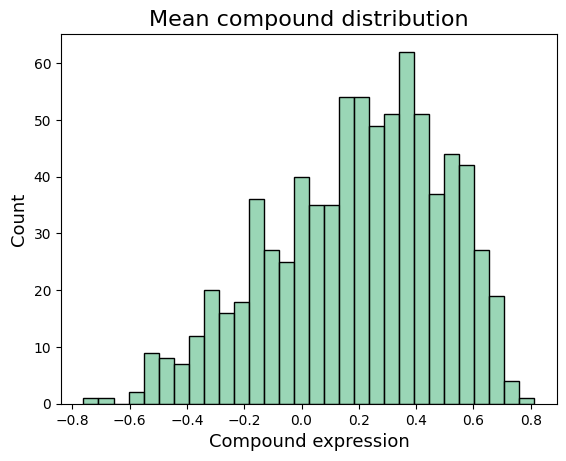

In [24]:
df_hist = df_num.mean(axis = 0) #axis = 0 by column
sns.histplot(df_hist, bins = 30,color='#79C99E',edgecolor="k") 

#The mean value for each compound has been plotted
plt.title('Mean compound distribution',fontsize=16)
plt.xlabel('Compound expression',fontsize=13)
plt.ylabel('Count',fontsize=13) ;

plt.savefig( 'Figures/mean_multiomic_distribution.png' , dpi=200,bbox_inches = 'tight' , pad_inches = 0.2 , facecolor='w')

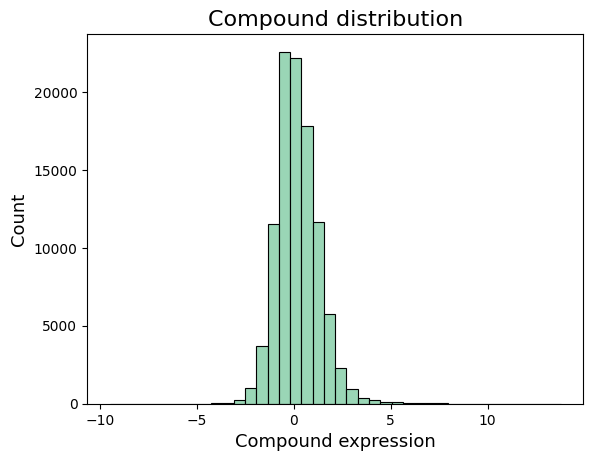

In [26]:
df_num = df_num.to_numpy()

df_hist = df_num.flatten()
sns.histplot(df_hist, bins = 40,color='#79C99E',edgecolor="k") 

plt.title('Compound distribution',fontsize=16)
plt.xlabel('Compound expression',fontsize=13)
plt.ylabel('Count',fontsize=13) ;

plt.savefig( 'Figures/multiomic_distribution.png' , dpi=200,bbox_inches = 'tight' , pad_inches = 0.2 , facecolor='w')

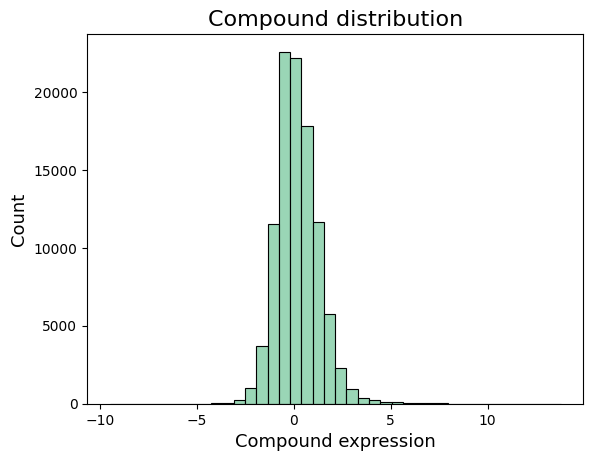

In [ ]:
df_num = df_num.to_numpy()

df_hist = df_num.flatten()
sns.histplot(df_hist, bins = 40,color='#79C99E',edgecolor="k") 

plt.title('Compound distribution',fontsize=16)
plt.xlabel('Compound expression',fontsize=13)
plt.ylabel('Count',fontsize=13) ;

#plt.savefig( 'Figures/multiomic_distribution.png' , dpi=200,bbox_inches = 'tight' , pad_inches = 0.2 , facecolor='w')

In [ ]:
#print(df.iloc[:,-5:])
df_heatmap = df.groupby('WHO_status').mean(numeric_only=True)
#print(df_heatmap.iloc[:,-5:])

g = sns.clustermap(
    df_heatmap,
    metric='euclidean', 
    method ="ward",
    row_cluster=False,
    xticklabels=False,
    cmap='RdBu_r',
    figsize=(9,3),
    dendrogram_ratio=0.2, 
    vmin=-2, 
    vmax=2) 

g2 = g.ax_heatmap
g2.set_xlabel("Metabolites", fontsize = 15,labelpad=10) #labelpad increases the distance between the axis label and the heatmap
g2.set_ylabel("WHO status", fontsize = 15, labelpad=12) 
g2.set_yticklabels(g2.get_yticklabels(), rotation=0, fontsize=10)  #rotate the y-axis labels so that they are horizontal

x0, _y0, _w, _h = g.cbar_pos
g.ax_cbar.set_position([1.15, 0.28, 0.03, 0.35])
g.cax.set_title("Metabolite expression",pad=10, size=13) #pad: increase spacing slightly  
g.cax.tick_params(labelsize=10) #change font size of colourbar labels; 

#plt.savefig( 'Figures/metabolite_heatmap.png' , dpi=200,bbox_inches = 'tight' , pad_inches = 0.2 , facecolor='w')

In [ ]:
#Carry out PCA

#from sklearn.decomposition import PCA

features = df.columns[:-2]
x = df.loc[:, features].values

pca = PCA(n_components=2)
principal_components = pca.fit_transform(x)
df2 = pd.DataFrame(data = principal_components, columns = ['PC1', 'PC2'])

#Restore original index
df2 = df2.set_index(df.index)

#Concatenate WHO information
df3 = pd.concat([df2, df[['WHO_status']]], axis = 1)

display(df3)



sns.set_style("white")


sns.lmplot(
    x='PC1', 
    y='PC2', 
    data=df3, 
    hue='WHO_status', 
    hue_order = ['0', '1-2', '3-4','5-7'],
    fit_reg=False, #don't draw line of best fit
    legend=False,
    scatter_kws={"s": 20}
    )
#Note: I don't use the seaborn legend but check it matches with the seaborn legend


plt.title('PCA for metabolites',fontsize=20)
plt.xlabel('PC1 (' + str(round(pca.explained_variance_ratio_[0]*100,2)) + '%)',fontsize=15,)
plt.ylabel('PC2 (' + str(round(pca.explained_variance_ratio_[1]*100,2)) + '%)',fontsize=15)
plt.legend(framealpha=1, frameon = 'True', title="WHO status",title_fontsize='large', prop={'size': 14}, bbox_to_anchor=(1.04, 0.7)) 
#This has more information on the bbox_to_anchor coordinates: https://stackoverflow.com/questions/4700614/how-to-put-the-legend-outside-the-plot

#plt.savefig( 'Figures/metabolite_PCA.png' , dpi=200,bbox_inches = 'tight' , pad_inches = 0.2 , facecolor='w')


### FOR DATA INTEGRATION STEP OR IF COMPARING BY CASE SEVERITY
### Subset the data to common samples

We make two different networks, one for the COVID cases 1-2 compared to COVID cases 3-7 <br>
This is because there are only 18 samples in common between the metabolomic and proteomic datasets

0       Common samples: 18           Metabolomic samples: 133        Proteomic samples: 123 <br>
1-2       Common samples: 45          Metabolomic samples: 45        Proteomic samples: 48 <br>
3-4       Common samples: 56          Metabolomic samples: 57        Proteomic samples: 59 <br>
5-7       Common samples: 27          Metabolomic samples: 28        Proteomic samples: 28 <br>

146 common samples overall,   128 cases, composed of (45 samples (WHO 1-2) vs 83 samples (WHO 3-7))

In [ ]:
df2 = pd.read_csv('Data/Su_COVID_proteomics_processed.csv', index_col=0)
list1 = list(df.index)
list2 = list(df2.index)

#Obtain common samples and subset accordingly
intersection = list(set(df.index.tolist()) & set(df2.index.tolist())) #set removes duplicates
intersection = [sample for sample in intersection if sample.startswith("INCOV")]
df = df[df.index.isin(intersection)]

print(len(df))

In [ ]:
df_mild = (df[df["WHO_status"] == '1-2']) #45 samples, no need to remove the metadata, since I do that in a later step
df_severe = (df[(df["WHO_status"] == '3-4') | (df["WHO_status"] == '5-7')]) #83 samples

### Single sample pathway analysis

In [ ]:
#Trying to download latest version of Reactome (version 84)


#reactome_pathways = sspa.process_reactome("Homo sapiens", download_latest=True, filepath=".")
reactome_pathways = sspa.process_gmt("Data/Reactome_Homo_sapiens_pathways_compounds_R84.gmt")
#View name of pathway IDs
reactome_pathways

kpca_scores = sspa.sspa_kpca(df.iloc[:,:-2], reactome_pathways)
#We have 160 pathways present, although the previous report had 165 pathways

#print(kpca_scores.iloc[-10:,-2:])
#print(kpca_scores)
#won't work with the metabolite dataset with names
kpca_scores

In [ ]:
#Remove root pathways
#Convert pathway ID to name
root_path = pd.read_excel('Data/Root_pathways.xlsx', header=None)
root_pathway_dict = {root_path[0][i]:root_path[1][i] for i in range(0,len(root_path))}

root_pathway_names = list(root_pathway_dict.keys())
#Using Sara's code
kpca_scores = kpca_scores.drop(columns = list(set(root_pathway_names) & set(kpca_scores.columns)))

In [ ]:
kpca_scores

### kPCA figures

In [ ]:

kpca_hist = kpca_scores.to_numpy()
kpca_hist = kpca_hist.flatten()
sns.histplot(kpca_hist, bins = 40,color='#F7C3B1',edgecolor="k") 

plt.title('Metabolite pathway score distribution',fontsize=16)
plt.xlabel('Pathway score',fontsize=13, labelpad=5)
plt.ylabel('Count',fontsize=13, labelpad=10) ;

#plt.savefig( 'Figures/metabolite_pathway_distribution.png' , dpi=200,bbox_inches = 'tight' , pad_inches = 0.2 , facecolor='w')

In [ ]:
#Carry out PCA

#from sklearn.decomposition import PCA

features = kpca_scores.columns
x = kpca_scores.loc[:, features].values

pca = PCA(n_components=2)
principal_components = pca.fit_transform(x)
df2 = pd.DataFrame(data = principal_components, columns = ['PC1', 'PC2'])

#Restore original index
df2 = df2.set_index(df.index)

#Concatenate WHO information
df3 = pd.concat([df2, df[['WHO_status']]], axis = 1)

#display(df3)


sns.set_style("white")


sns.lmplot(
    x='PC1', 
    y='PC2', 
    data=df3, 
    hue='WHO_status', 
    hue_order = ['0', '1-2', '3-4','5-7'],
    fit_reg=False, 
    legend=False,
    scatter_kws={"s": 20}
    )
#Note: I don't use the seaborn legend but check it matches with the seaborn legend


plt.title('PCA kPCA metabolite scores',fontsize=20)
plt.xlabel('PC1 (' + str(round(pca.explained_variance_ratio_[0]*100,2)) + '%)',fontsize=15)
plt.ylabel('PC2 (' + str(round(pca.explained_variance_ratio_[1]*100,2)) + '%)',fontsize=15)
plt.legend(framealpha=1, frameon = 'True', title="WHO status",title_fontsize='large', prop={'size': 14}, bbox_to_anchor=(1.04, 0.7))
#This has more information on the bbox_to_anchor coordinates: https://stackoverflow.com/questions/4700614/how-to-put-the-legend-outside-the-plot
#plt.savefig( 'Figures/metabolite_kPCA_PCA.png' , dpi=200,bbox_inches = 'tight' , pad_inches = 0.2 , facecolor='w')


In [ ]:
#Normalise pathway scores : https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

#StandardScaler() normalises by column i.e. each pathway is normalised across all patients
#mean of the observed values becomes 0 and the standard deviation is 1

#After meeting: Normalising doesn't seem to have a large effect
#Whether or not you normalise won't make a huge difference
kpca_scores_norm = pd.DataFrame(StandardScaler().fit_transform(kpca_scores),columns=kpca_scores.columns, index=kpca_scores.index)

#print(kpca_scores_norm.max().max())
#print(kpca_scores_norm.min().min())
#print(kpca_scores_norm.mean(axis = 0)) #mean of 0  
#print(kpca_scores_norm.std(axis = 0)) #sd of 1



kpca_hist = kpca_scores_norm.to_numpy()
kpca_hist = kpca_hist.flatten()
sns.histplot(kpca_hist, bins = 40,color='#F7C3B1',edgecolor="k") 

plt.title('Normalised metabolite pathway score distribution',fontsize=16)
plt.xlabel('Pathway score',fontsize=13, labelpad=5)
plt.ylabel('Count',fontsize=13, labelpad=10) ;

#plt.savefig( 'Figures/normalised_metabolite_pathway_distribution.png' , dpi=200,bbox_inches = 'tight' , pad_inches = 0.2 , facecolor='w')

In [ ]:
#Carry out PCA on NORMALISED values

#from sklearn.decomposition import PCA

features = kpca_scores_norm.columns
x = kpca_scores_norm.loc[:, features].values

pca = PCA(n_components=2)
principal_components = pca.fit_transform(x)
df2 = pd.DataFrame(data = principal_components, columns = ['PC1', 'PC2'])

#Restore original index
df2 = df2.set_index(df.index)

#Concatenate WHO information
df3 = pd.concat([df2, df[['WHO_status']]], axis = 1)

#display(df3)


sns.set_style("white")


sns.lmplot(
    x='PC1', 
    y='PC2', 
    data=df3, 
    hue='WHO_status', 
    hue_order = ['0', '1-2', '3-4','5-7'],
    fit_reg=False, 
    legend=False,
    scatter_kws={"s": 20}
    )
#Note: I don't use the seaborn legend but check it matches with the seaborn legend


plt.title('PCA kPCA normalised metabolite scores',fontsize=20)
plt.xlabel('PC1 (' + str(round(pca.explained_variance_ratio_[0]*100,2)) + '%)',fontsize=15)
plt.ylabel('PC2 (' + str(round(pca.explained_variance_ratio_[1]*100,2)) + '%)',fontsize=15)
plt.legend(framealpha=1, frameon = 'True', title="WHO status",title_fontsize='large', prop={'size': 14}, bbox_to_anchor=(1.04, 0.7))
#This has more information on the bbox_to_anchor coordinates: https://stackoverflow.com/questions/4700614/how-to-put-the-legend-outside-the-plot
#plt.savefig( 'Figures/normalised_metabolite_kPCA_PCA.png' , dpi=200,bbox_inches = 'tight' , pad_inches = 0.2 , facecolor='w')



### Spearman correlation coefficient

In [ ]:
kpca_scores

In [ ]:
#Note: Spearman correlation coefficient results are the same whether or not the kPCA scores are normalised

#"If axis=0 (default), then each column represents a variable, with observations in the rows"
spearman_results = scipy.stats.spearmanr(kpca_scores)

spearman_coef = spearman_results[0] #correlation coefficients
spearman_pvals = spearman_results[1] #p-values


#Using Sara's code (rather than having separate dataframes for each analysis, add all together in long format)
squared_spearman_coef_df = pd.DataFrame(spearman_coef,columns = kpca_scores.columns, index=kpca_scores.columns)
squared_spearman_coef_list = squared_spearman_coef_df.stack().reset_index()
squared_spearman_coef_list.columns = ["Pathway1", "Pathway2", "Spearman_corr"]
squared_spearman_coef_list["Squared_corr"]  = np.square(squared_spearman_coef_list.Spearman_corr)

spearman_pvals_df = pd.DataFrame(spearman_pvals,columns = kpca_scores.columns, index=kpca_scores.columns)
spearman_pvals_list = spearman_pvals_df.stack().reset_index()
spearman_pvals_list.columns = ["Pathway1", "Pathway2", "pval"]

#Multiple testing correction for the p-values to prepare the corrected p-values for the final correlation network
#Multiplies by the correct number of tests (i.e. not including the duplicates or self-comparisons)
#Does not remove the diagonals or the duplicates themselves
#  ((160x160)-160)  / 2
num_of_tests = (len(kpca_scores.columns)**2 - len(kpca_scores.columns))/2
print(num_of_tests)
corrected_spearman_pvals = spearman_pvals_list.pval*num_of_tests
#If the p-val goes beyond 1 (max number for a p-value, change to 1)
corrected_spearman_pvals = np.where(corrected_spearman_pvals < 1, corrected_spearman_pvals, 1)
spearman_pvals_list["pval_adj"]  = corrected_spearman_pvals

spearman_df = squared_spearman_coef_list.merge(spearman_pvals_list,on=["Pathway1","Pathway2"])

display(spearman_df)

Bonferroni: https://avast.github.io/ep-stats/stats/multiple.html

Method 1: The alpha value (0.05) is divided by the number of tests (e.g. 225 pathways x 225 pathways = 50,625) and then the original p-vals are compared to the adjusted alpha value

Method 2: The alpha value remains unchanged and the individual p-values are adjusted (i.e. original p-value x number of tests) to increase them, and then compared to see if they cross the 0.05 significance level

After adjustment, some corrected p-values go up to 1 (the maximum)

In [ ]:
#Perform multiple testing correlation on p-values after the duplicates are removed

#All self-comparisons are significant with a p-value of 0, so we can subtract those from the number of significant values before we divide by 2
sig_vals = (sum(i < 0.005 for i in spearman_df.pval_adj)-len(kpca_scores.columns))   /2
non_sig_vals = sum(i >= 0.005 for i in spearman_df.pval_adj)/2

print("Number of significant values:", sig_vals)
print("Number of non-significant values:", non_sig_vals)
(sig_vals/(sig_vals+non_sig_vals)) * 100

In [ ]:
squared_spearman_coef = np.square(spearman_coef)
abs_spearman_coef = np.abs(spearman_coef)
spearman_hist = duplicate_removal(squared_spearman_coef)  #using a function I defined in the intro section

print(len(spearman_hist))
sns.histplot(spearman_hist, bins = 50,color='#FFD580',edgecolor="k") 

plt.title('Spearman correlation coefficient distribution',fontsize=16)
plt.xlabel('Correlation score',fontsize=16, labelpad=5)
plt.ylabel('Count',fontsize=16, labelpad=10) ;

#plt.savefig('Figures/metabolite_spearman_correlation_distribution_squared_non_dup.png' , dpi=200,bbox_inches = 'tight' , pad_inches = 0.2 , facecolor='w')

In [ ]:

#The reason for plotting as absolute or squared is that kPCA does not determine the directionality of effect
#Therefore the direction specified here is arbitrary i.e. negative pathway score does not mean downregulation of pathway


g = sns.clustermap(
    squared_spearman_coef,
    metric='euclidean', 
    method ="ward",
    cmap="OrRd",    #Spectral_r for normal,  OrRd for the other two
    xticklabels=False,
    yticklabels=False,
    figsize=(6,6),
    dendrogram_ratio=0.15, 
    vmin=0, 
    vmax=1) 

g2 = g.ax_heatmap
g2.set_xlabel("Pathways", fontsize = 17, labelpad=10) #labelpad increases the distance between the axis label and the heatmap
g2.set_ylabel("Pathways", fontsize = 17, labelpad=10) 

x0, _y0, _w, _h = g.cbar_pos
g.ax_cbar.set_position([1.1, 0.25, 0.03, 0.35])
g.cax.set_title("Correlation score",pad=13,size=13) #pad: increase spacing slightly  
g.cax.tick_params(labelsize=12) #change font size of colourbar labels; 

#plt.savefig( 'Figures/squared_metabolite_spearman.png' , dpi=200,bbox_inches = 'tight' , pad_inches = 0.2 , facecolor='w')

In [ ]:
#Plotting the Spearman p-values
np.seterr(divide = 'ignore')    
log_spearman_pvals = -np.log10(spearman_pvals)
np.seterr(divide = 'warn') 

spearman_pval_hist = duplicate_removal(log_spearman_pvals)  #Some inf values that are not plotted (too far along axis)
print(len(spearman_pval_hist))
sns.histplot(spearman_pval_hist, bins = 50,color='#FFD580',edgecolor="k") 

plt.title('Spearman p-value distribution',fontsize=16)
plt.xlabel('Spearman p-values (-log10)',fontsize=16, labelpad=5)
plt.ylabel('Count',fontsize=16, labelpad=10) ;

#plt.savefig('Figures/metabolite_spearman_pval_distribution_non_dup.png' , dpi=200,bbox_inches = 'tight' , pad_inches = 0.2 , facecolor='w')

### Overlap coefficients

I believe that sspa kPCA automatically filters out all pathways that have less than 2 compounds in them (confirmed since the pathway with the minimum number of metabolites had 2 compounds). When I filter out the compounds that are not in the dataset, I only include them into the new dictionary if the values have more than 1 compound.

In [ ]:
#Obtain pathways and corresponding metabolites for all Reactome pathways, store as dictionary
orig_dict = sspa.utils.pathwaydf_to_dict(reactome_pathways)

#Filter out dictionary to retain only the pathways that remain after kPCA
my_keys = kpca_scores.columns
pathways_dict = {key: orig_dict[key] for key in my_keys}


In [ ]:
#Filter out the compounds in the pathways that are not present in the dataset

#Obtain all unique values in dataset
compounds_present = list(df.columns[:-2])
filtered_dict = {} 

#My code adapted from Cecilia's
#If the key values are not part of the compounds in dataset then remove
for key,value in pathways_dict.items():
    new_val = [item for item in value if item in compounds_present]
    if len(new_val) >= 2: #at least two compounds in the pathway
        filtered_dict[key] = new_val



In [ ]:
#Identifying all duplicate pathways from the Reactome pathway dictionary AFTER COMPOUNDS NOT IN PATHWAY REMOVED (the exact same metabolites, not subsets)

metabolites = list(filtered_dict.values())

from collections import Counter

c = Counter(map(tuple,metabolites))
dups = [k for k,v in c.items() if v>1]
result = [list(t) for t in dups]

for j in result:
    value = {i for i in filtered_dict if filtered_dict[i]==j}
    print(value)
    

In [ ]:
#Find the pathways with the minimum and maximum number of metabolites in pathways AFTER COMPOUNDS NOT IN PATHWAY REMOVED

max_len = max(metabolites, key=len)
print(len(max_len))

min_len = min(metabolites, key=len)
print(len(min_len))


for index in range(0,len(metabolites)):
    length = 33
    value = {key for key in filtered_dict if len(filtered_dict[key])==length}
print(value)

#len(filtered_dict['R-HSA-1430728'])

In [ ]:
#Checking Overlap coefficient code for the cell below

list1 = ['A','B','C','D','E','F','G']
list2 = ['A','B','C','J','K','L','M','N']
intersection = list(set(list1).intersection(list(set(list2))))  #set removes duplicates
numerator = len(intersection)

smaller_set = []
smaller_set.append(len(list1))
smaller_set.append(len(list2))
denominator = min(smaller_set)

val = (numerator/denominator)
print(val)

In [ ]:
#Difference between Jaccard similarity metric and S-S Overlap Coefficient
#https://developer.nvidia.com/blog/similarity-in-graphs-jaccard-versus-the-overlap-coefficient/

#Using Overlap Coefficient formula 
#My original code is in 'Overlap_coefficient_ver83.ipynb'
#I adapted by code by looking at Cecilia's comments
oc_matrix = np.zeros((len(my_keys),len(my_keys)))    

for i in range(0,len(my_keys)):   
    list1 = filtered_dict[my_keys[i]]
    
    for j in range(0,len(my_keys)):
        list2 = filtered_dict[my_keys[j]]

        # Szymkiewicz–Simpson coefficient
        #Find intersection between two lists
        intersection = len(list(set(list1).intersection(list(set(list2)))))
        smaller_set = min(len(list1), len(list2))

        val = intersection/smaller_set
        oc_matrix[i][j] = val 
        

In [ ]:
oc_df = pd.DataFrame(oc_matrix, index=filtered_dict.keys(), columns=filtered_dict.keys())
#Calculate number of edges with values above or equal to 0.5

#If looking at whole matrix (not accounting for self comparisons or duplicates)
#print(np.count_nonzero(oc_matrix >= 0.5)/(len(my_keys)*len(my_keys)))

#Subtract by number of self-comparisons divided by 2
high_overlap = (np.count_nonzero(oc_matrix >= 0.5) - len(my_keys)) / 2
unique_edges =  ((len(my_keys)*len(my_keys)) - len(my_keys)) / 2

print(high_overlap  /  unique_edges) 


In [ ]:
oc_list = oc_df.stack().reset_index()
oc_list.columns = ["Pathway1", "Pathway2", "Overlap_coef"]
spearman_df = spearman_df.merge(oc_list,on=["Pathway1","Pathway2"])

display(spearman_df)

In [ ]:
g = sns.clustermap(oc_matrix,
metric='euclidean', 
method ="ward",
cmap = "OrRd", 
xticklabels=False, 
yticklabels=False, 
figsize=(6,6),
dendrogram_ratio=0.2, 
vmin=-0, 
vmax=1) 

g2 = g.ax_heatmap
g2.set_xlabel("Pathways", fontsize = 17, labelpad=10) #labelpad increases the distance between the axis label and the heatmap
g2.set_ylabel("Pathways", fontsize = 17, labelpad=10) 
g2.set(yticklabels=[])  #remove tick labels
g2.tick_params(right=False) #remove ticks

x0, _y0, _w, _h = g.cbar_pos
g.ax_cbar.set_position([1.15, 0.25, 0.03, 0.35])
g.cax.set_title("Overlap Coefficient",pad=13,size=13) #pad: increase spacing slightly  
g.cax.tick_params(labelsize=12) #change font size of colourbar labels; 

#plt.savefig( 'Figures/metabolite_overlap_coef.png' , dpi=200,bbox_inches = 'tight' , pad_inches = 0.2 , facecolor='w')

In [ ]:
#Plotting the overlap coefficient

oc_hist = duplicate_removal(oc_matrix)
print(len(oc_hist))
sns.histplot(oc_hist, bins = 50,color='#FFD580',edgecolor="k") 

plt.title('Overlap coefficient distribution',fontsize=16)
plt.xlabel('Overlap coefficient',fontsize=16, labelpad=5)
plt.ylabel('Count',fontsize=16, labelpad=10) ;

#plt.savefig('Figures/metabolite_overlap_coef_distribution_non_dup.png' , dpi=200,bbox_inches = 'tight' , pad_inches = 0.2 , facecolor='w')

In [ ]:

f, ax = plt.subplots()
points = ax.scatter(x=oc_hist, y=spearman_pval_hist,c=spearman_hist, s=4, cmap="viridis",alpha=0.3)

cb = plt.colorbar(points, ticks=[0,0.2,0.4,0.6,0.8,1],shrink=0.5)
cb.ax.set_position([0.9, 0.28, 0.03, 0.35])
cb.ax.set_title('Spearman correlation',pad=10, size=10) #pad means the height of title away from colourbar


plt.xlabel("Overlap coefficient",fontsize=13, labelpad=5)
plt.ylabel("Spearman p-values (-l0g10)",fontsize=13, labelpad=10) 

plt.axvline(x=0.5, color='r', linewidth=0.3, linestyle='-')
plt.axhline(y=-np.log10(0.005), color='r', linewidth=0.3, linestyle='-') ;

#plt.savefig('Figures/metabolite_scatterplot.png' ,dpi=200,bbox_inches = 'tight' , pad_inches = 0.2 , facecolor='w')


### Constructing overlap coefficient network graphs

In [ ]:
#Practice code
#Even for an edge going between two pathways, it's a single line here and in Cytoscape as well
#If you wanted to draw multiple edges going between the same two nodes, you would need to draw a multigraph
G = nx.Graph()

practice_df = {'Pathway1': ['A', 'B', 'C', 'D','D'], 'Pathway2': ['B','A','D','C','D'], 'weight': [1,1,2,5,3]}
pd.DataFrame(data=practice_df, index=[0, 1, 2, 3,4])

G = nx.from_pandas_edgelist(df=practice_df, source='Pathway1', target='Pathway2', edge_attr='weight')

nx.draw(G, with_labels = True)

#nx.write_gml(G, "test.gml")

Using Cecilia's code

Note: I don't remove the duplicate edges for the overlap coefficient graph, they seemed to be removed during NetworkX graph construction.
I do remove the diagonals though.

In [ ]:
#Remove self-correlations
spearman_df = spearman_df [spearman_df.Pathway1 != spearman_df.Pathway2]
spearman_df = spearman_df.reset_index(drop=True)
spearman_df

In [ ]:

#Add the nodes
G = nx.Graph()
G.add_nodes_from(oc_df.columns)

#does not deal with duplicates i.e.  Pathway 1 to Pathway 2 and vice versa
#but it's ok, because it shows up as one edge on the network in Cytoscape

G = nx.from_pandas_edgelist(df=spearman_df, source='Pathway1', target='Pathway2', edge_attr='Overlap_coef')

nx.draw(G, with_labels = True)
print(G.number_of_edges())
print(G.number_of_nodes())
#nx.write_gml(G, "Cytoscape/metabolomic_oc.gml")

### Final correlation network

Remember to take the corrected Spearman p-values

In [ ]:
spearman_df

#spearman_df.to_csv("Data/metabolomic_edgelist_df_all.csv")
#spearman_df.to_csv("Data/metabolomic_edgelist_df_commoncases.csv")

In [ ]:
#MAKE A GRAPH WITH ALL THE EDGES FOR THE INTEGRATION STAGE

G = nx.Graph()
G = nx.from_pandas_edgelist(df=spearman_df, source='Pathway1', target='Pathway2', edge_attr='Squared_corr')
#G.add_nodes_from(isolated_nodes)
nx.draw(G, with_labels = True)
print(G.number_of_nodes())
print(G.number_of_edges())


#Add edge attributes
spearman_pval_dict = {}
overlap_coef_dict = {}
for i in range(0,len(spearman_df)):
    spearman_pval_dict[(spearman_df.Pathway1[i],spearman_df.Pathway2[i])] = spearman_df.pval_adj[i]
    overlap_coef_dict[(spearman_df.Pathway1[i],spearman_df.Pathway2[i])] = spearman_df.Overlap_coef[i]


nx.set_edge_attributes(G, spearman_pval_dict, "Spearman_pval")
nx.set_edge_attributes(G, overlap_coef_dict, "Overlap_coef")

G.edges["R-HSA-110331","R-HSA-112310"]#["Spearman_pval"]

#nx.write_gml(G,'Cytoscape/metabolomic_prefiltered.gml')
#nx.write_gml(G,'Cytoscape/metabolomic_prefiltered_severecases.gml')


In [ ]:
#Create EDGE ATTRIBUTES table to filter out unneeded edges

final_df = spearman_df[spearman_df["pval_adj"] < 0.005]  
final_df = final_df[final_df["Overlap_coef"] < 0.5]
final_df = final_df.reset_index(drop=True) 
display(final_df) #the duplicate edges have not been removed yet

#In some instances, I have nodes which have no edges, and the results are different to Sara's
#Can check the pathways prior to Overlap Coefficient filtering here
#final_df[final_df["Pathway1"] == "R-HSA-196854"]

Plot spearman correlation histogram to show edges AFTER filtering

In [ ]:
#Remove duplicates in the edge list

final_df_copy = final_df.copy()

#Remove duplicate pathways
for i in range(0,len(final_df)):
    val1 = final_df.Pathway1[i]
    val2 = final_df.Pathway2[i]
    #print(val1,val2)
    #print(max(val1,val2))
    final_df_copy.Pathway1[i] = min(val1,val2)
    final_df_copy.Pathway2[i] = max(val1,val2)

final_df_copy = final_df_copy.sort_values(['Pathway1','Pathway2'], ascending=True)
final_df_copy = final_df_copy[::2]

In [ ]:
print(len(final_df_copy))
spearman_hist = list(final_df_copy.Squared_corr)
sns.histplot(spearman_hist, bins = 50,color='#FFD580',edgecolor="k") 

plt.title('Spearman correlation coefficient distribution',fontsize=16)
plt.xlabel('Correlation score',fontsize=16, labelpad=5)
plt.ylabel('Count',fontsize=16, labelpad=10) ;

#plt.savefig('Figures/metabolite_spearman_correlation_distribution_squared_afterfiltering.png' , dpi=200,bbox_inches = 'tight' , pad_inches = 0.2 , facecolor='w')

In [ ]:
pathways_with_edges = set(final_df.Pathway1)
isolated_nodes = set(spearman_df.Pathway1) - set(pathways_with_edges) 
isolated_nodes
#len(pathways_with_edges)

In [ ]:
#Draw network graph with new edges
G = nx.Graph()
G = nx.from_pandas_edgelist(df=final_df, source='Pathway1', target='Pathway2', edge_attr='Squared_corr')
#G.add_nodes_from(isolated_nodes)
nx.draw(G, with_labels = True)
print(G.number_of_nodes())
print(G.number_of_edges())

In [ ]:

#Add edge attributes
spearman_pval_dict = {}
overlap_coef_dict = {}
for i in range(0,len(final_df)):
    spearman_pval_dict[(final_df.Pathway1[i],final_df.Pathway2[i])] = final_df.pval_adj[i]
    overlap_coef_dict[(final_df.Pathway1[i],final_df.Pathway2[i])] = final_df.Overlap_coef[i]
    
nx.set_edge_attributes(G, spearman_pval_dict, "Spearman_pval")
nx.set_edge_attributes(G, overlap_coef_dict, "Overlap_coef")

#G.edges["R-HSA-110331","R-HSA-112310"]#["Spearman_pval"]



### Optional: Read in the metabolomic network to display the differential network

In [ ]:
G = nx.read_gml("Cytoscape/metabolomic_prefiltered_commoncases.gml")
with open('Data/permutation_test_files_metabolomics/not_sig_edges.txt') as f:
    lines = f.readlines()

In [ ]:
edges_to_remove = []

edges = lines[0].split(",")
edges

for index in range(0,len(edges),2):
    list1 = edges[index],(edges[index+1][1:])
    edges_to_remove.append(tuple(list1))

len(edges_to_remove)

In [ ]:
G.remove_edges_from(edges_to_remove)
print(G.number_of_nodes())
print(G.number_of_edges())  
G.nodes()

In [ ]:
edges_to_remove_pval = [(u,v) for u,v,e in G.edges(data=True) if (e['Spearman_pval'] >= 0.005)]
print(len(edges_to_remove_pval))
edges_to_remove_pval

In [ ]:
edges_to_remove_oc = [(u,v) for u,v,e in G.edges(data=True) if (e['Overlap_coef'] >= 0.5)]
print(len(edges_to_remove_oc))
edges_to_remove_oc

In [ ]:
len(list(set(edges_to_remove_pval).intersection(set(edges_to_remove_oc)))) #After filtering out the nonsignificant edges from the permutations, 6 of the edges from the metabolomic common case dataset have Spearman p-val >= 0.005 and OC >= 0.5 

In [ ]:
edges_to_remove = [(u,v) for u,v,e in G.edges(data=True) if (e['Spearman_pval'] >= 0.005 or e['Overlap_coef'] >= 0.5)]
G.remove_edges_from(edges_to_remove)
print(G.number_of_nodes())
print(G.number_of_edges())
G.nodes(data=True)

In [ ]:
nodes_to_remove = list(nx.isolates(G))
G.remove_nodes_from(nodes_to_remove)

### Setting node attributes

The betweenness centrality scores are the same whether or not the duplicates have been removed since the duplicate edges form the same edge when a graph is created

In [ ]:
#IF YOU DON'T REMOVE THE EDGES, DON'T RUN THIS CODE

#Add the betweenness centrality as a node attribute
betweenness= nx.betweenness_centrality(G, normalized=True) #output as dictionary
#display(betweenness)
nx.set_node_attributes(G, betweenness, "betweenness")

#Add the betweenness centrality as a node attribute
degree= nx.degree_centrality(G) #output as dictionary
#display(degree)
nx.set_node_attributes(G, degree, "degrees")


#Check
print(G.number_of_nodes()) 
#G.nodes['R-HSA-110331']#["betweenness"]

Setting the highest level of the pathway hierarchy 

In [ ]:
#Using Cecilia's code

#Creating graph
hierarchy = pd.read_csv('Data/ReactomePathwaysRelation.txt', sep='\t', header=None)

#From the pathways, subset to Homo sapiens only
hierarchy_hsa = hierarchy[hierarchy[0].str.contains('HSA')]

#Return unique values in the first column that is not in the second column as a numpy array
#These values are not child pathways in any instances
hierarchy_hsa_parents = np.setdiff1d(hierarchy_hsa[0], hierarchy_hsa[1])

#Add the unique values not in the second column as a second attached dataset to the bottom of the original data
#The first column represents the parent column, the second column is the child column
hierarchy_hsa_all = pd.concat([hierarchy_hsa, pd.DataFrame([hierarchy_hsa_parents, hierarchy_hsa_parents], index=[0, 1]).T])

#DiGraph is a directed graph
H = nx.from_pandas_edgelist(hierarchy_hsa, source=0, target=1, create_using=nx.DiGraph())


In [ ]:
#Find the root pathway

def find_root(H,child):
    #Find parent from child 
    parent = list(H.predecessors(child))

    #Keep the loop going until the highest level is reached
    if len(parent) == 0:
        return child
    else:  
        return find_root(H, parent[0])

hierarchy_hsa_all['Root'] = [find_root(H, i) for i in hierarchy_hsa_all[1]]

hierarchy_hsa_all.columns = ['Parent', 'Child', 'Root']

#There are 83 instances of duplicates, however all the child duplicates have the same root (even though different parents) after checking

root_pathways = {}
for pathway in list(H.nodes):
    index = hierarchy_hsa_all.Child[hierarchy_hsa_all.Child == pathway].index.tolist()[0]
    root_pathway  = hierarchy_hsa_all.Root[index]
    label = root_pathway_dict[root_pathway]
    root_pathways[pathway] = label


In [ ]:
#Shows all the root pathways in Reactome
set(hierarchy_hsa_all['Root'] )
#Shows all the root pathways present in the original dataset
set(root_pathways.values())

nx.set_node_attributes(G, root_pathways, "root_pathway")

print(G.number_of_nodes()) 

In [ ]:
#for some reason, not sure if really clustering by weight since it works with a typo 
#i think it works though, since changing the name gives a diff num of clusters even with seed set
#Resolution = 1 is the default, increasing resolution will yield more communities
louvain_clusters = nx.community.louvain_communities(G, weight='Squared_corr',seed=100,resolution=1.2)
print(len(louvain_clusters))

louvain_dict = {}
for index,grouping in enumerate(louvain_clusters):
    for pathway in grouping:
        louvain_dict[pathway] = index+1

nx.set_node_attributes(G, louvain_dict, "louvain")
    

In [ ]:
reactome_pathways = sspa.process_gmt("Data/Reactome_Homo_sapiens_pathways_compounds_R84.gmt")

pathway_name_dict = {reactome_pathways.index[i]:reactome_pathways["Pathway_name"][i] for i in range(0,len(reactome_pathways))}
pathway_name_dict['R-HSA-1483257']
pathway_name_dict = {k:pathway_name_dict[k] for k in list(G.nodes)}

nx.set_node_attributes(G, pathway_name_dict, "pathway_name")

In [ ]:
print(G.number_of_nodes())
print(G.number_of_edges())

print(G.nodes['R-HSA-110331'])#["betweenness"]
print(G.edges["R-HSA-110331", "R-HSA-112310"])#["Spearman_pval"]

In [ ]:
#nx.write_gml(G,'Cytoscape/metabolomic_final.gml')
#nx.write_gml(G,'Cytoscape/metabolomic_final_severecases.gml')